In [6]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("GlobalLandTemperaturesByCity.csv")
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


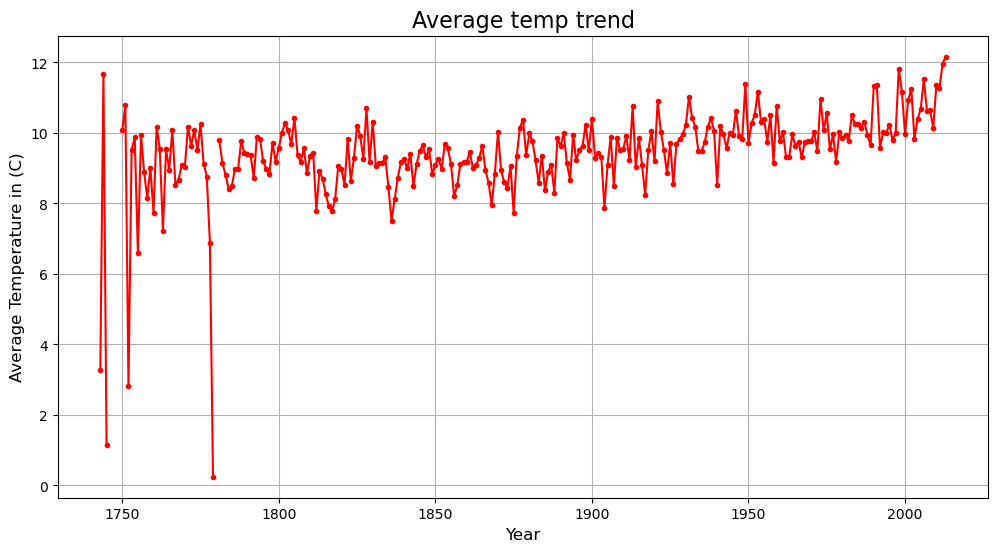

In [7]:
city = data[data['City'] == 'New York'].copy()
city['dt'] = pd.to_datetime(city['dt'], errors='coerce')  # Corrected 'errors' argument
city['Year'] = city['dt'].dt.year
annual = city.groupby('Year')['AverageTemperature'].mean().reset_index()
plt.figure(figsize=(12,6))
plt.plot(annual['Year'],annual['AverageTemperature'],linestyle="-",color="red",marker=".")
plt.title("Average temp trend",fontsize=16)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Average Temperature in (C)',fontsize=12)
plt.grid(True)
plt.show()

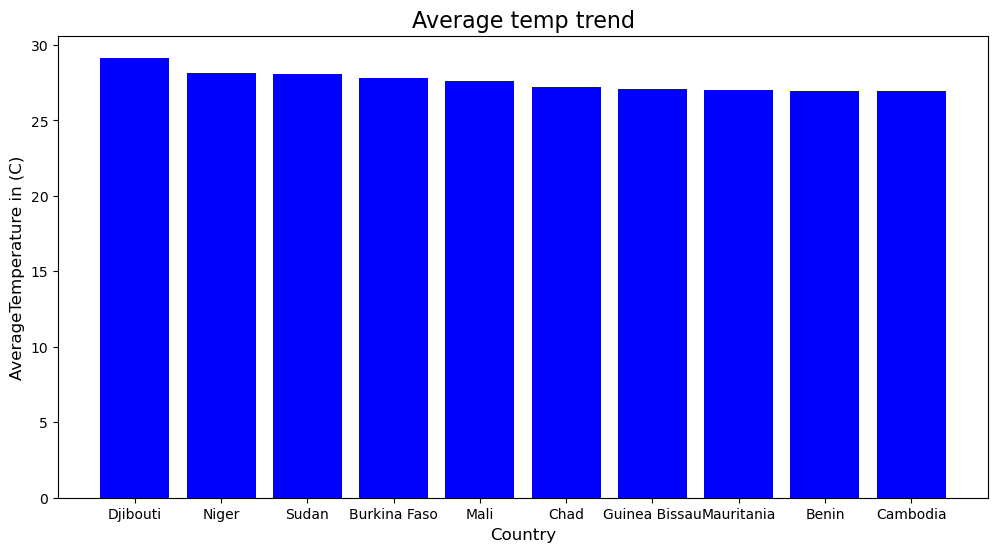

In [13]:
count_avg= data.groupby('Country')['AverageTemperature'].mean().reset_index()
count_avg=count_avg.dropna()
top_count=count_avg.sort_values(by='AverageTemperature',ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.bar(top_count['Country'],top_count['AverageTemperature'],color="blue")
plt.title("Average temp trend",fontsize=16)
plt.xlabel('Country',fontsize=12)
plt.ylabel('AverageTemperature in (C)',fontsize=12)
plt.show()


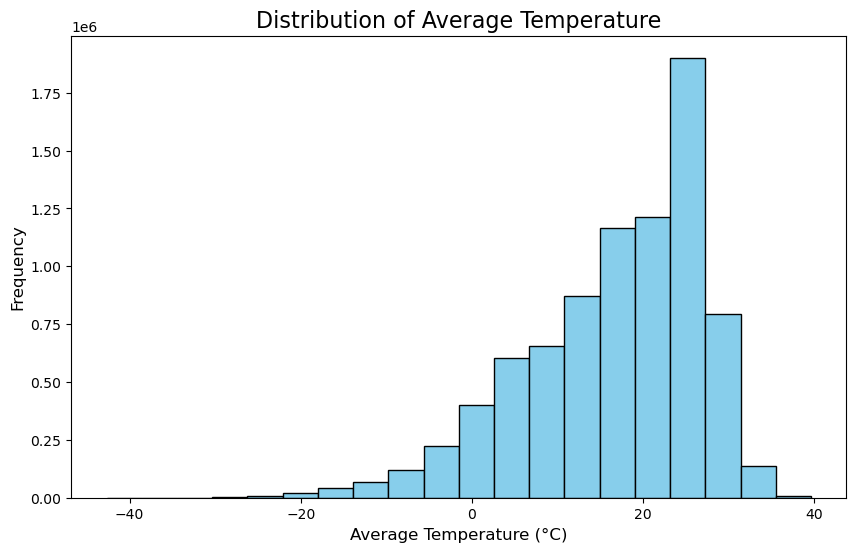

In [14]:
#Histogram
#wt is d distribution of average temperatire across all data?x-axis=Temperature ranges y-axis=Frequency
valid_data = data['AverageTemperature'].dropna()
plt.figure(figsize=(10, 6))
plt.hist(valid_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Temperature', fontsize=16)
plt.xlabel('Average Temperature (°C)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

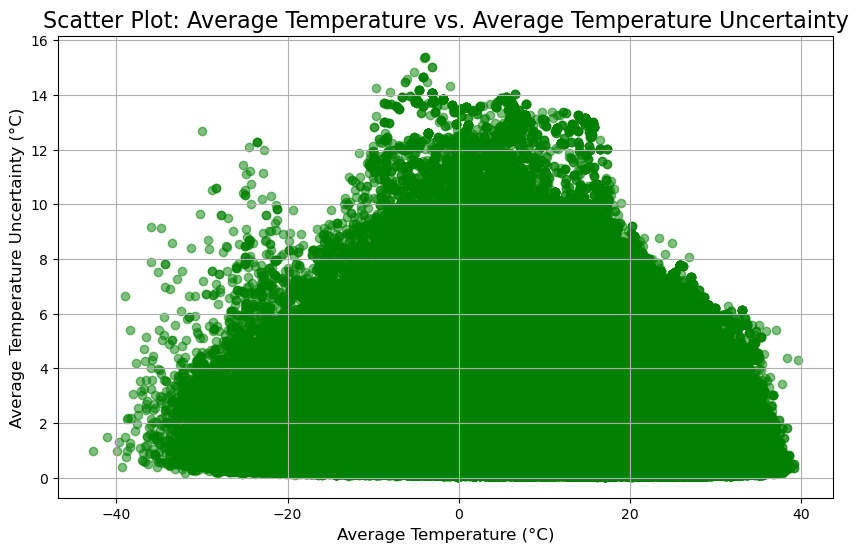

In [17]:
# Remove NaN values from both columns
cleaned_data = data[['AverageTemperature', 'AverageTemperatureUncertainty']].dropna()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data['AverageTemperature'], cleaned_data['AverageTemperatureUncertainty'], color='green', alpha=0.5)

# Add titles and labels
plt.title('Scatter Plot: Average Temperature vs. Average Temperature Uncertainty', fontsize=16)
plt.xlabel('Average Temperature (°C)', fontsize=12)
plt.ylabel('Average Temperature Uncertainty (°C)', fontsize=12)

# Show the plot
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

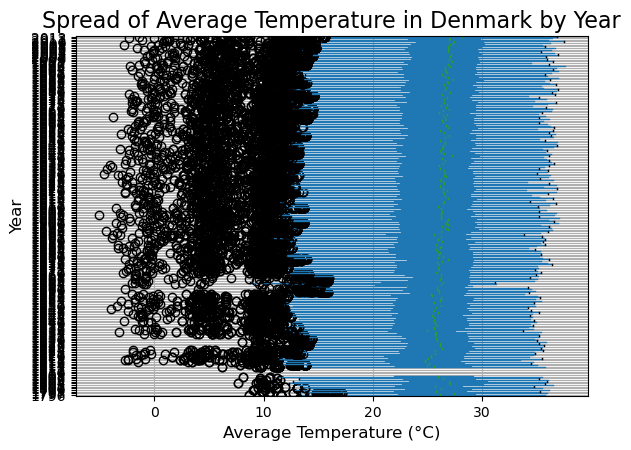

In [23]:
#box plot what is the spread of temperaure for a specific country over a given periods?
country_data = data[data['Country'] == 'India'].copy()  # Use .copy() to avoid SettingWithCopyWarning
country_data['dt'] = pd.to_datetime(country_data['dt'], errors='coerce')
country_data['Year'] = country_data['dt'].dt.year
country_data = country_data[['Year','AverageTemperature']]
plt.figure(figsize=(12,6))
country_data.boxplot(column='AverageTemperature', by='Year', vert=False, patch_artist=True)
plt.title('Spread of Average Temperature in Denmark by Year', fontsize=16)
plt.suptitle('')  # Remove the default title generated by `by`
plt.xlabel('Average Temperature (°C)', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.grid(True)
plt.show()

In [25]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [26]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
tips=sns.load_dataset("tips")
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


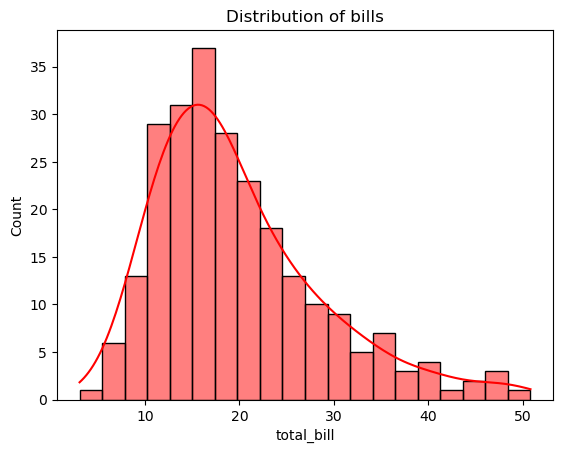

In [33]:
sns.histplot(data=tips,x="total_bill",kde=True,bins=20,color="red")
plt.title("Distribution of bills")
plt.show()

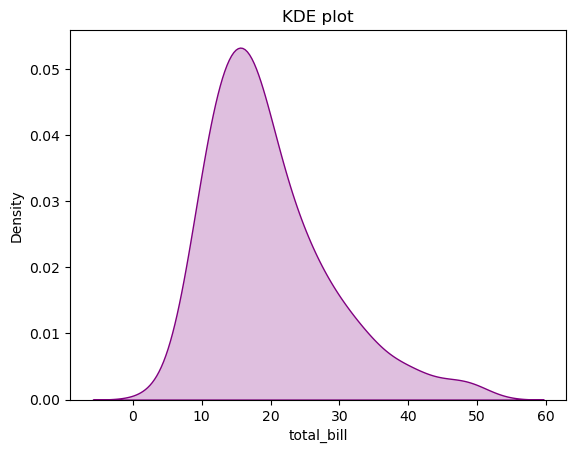

In [36]:
#Kernel Density Estimation visualize the probability density of a vrsatile
sns.kdeplot(data=tips,x="total_bill",fill=True,color="purple")
plt.title("KDE plot")
plt.show()

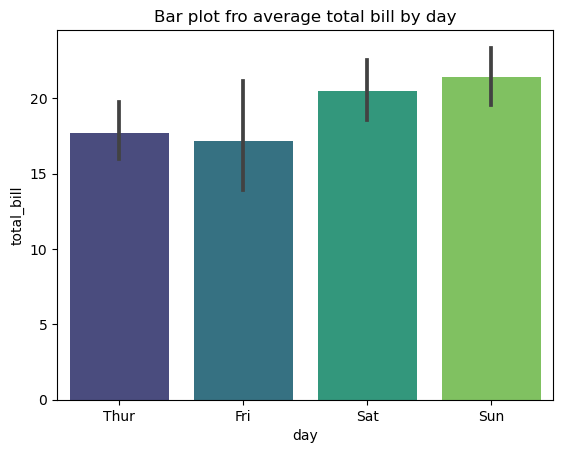

In [41]:
#barplot displays the mean of a quantitaive variable for different categoris
sns.barplot(data=tips,x="day",y="total_bill",palette="viridis")
plt.title("Bar plot fro average total bill by day")
plt.show()

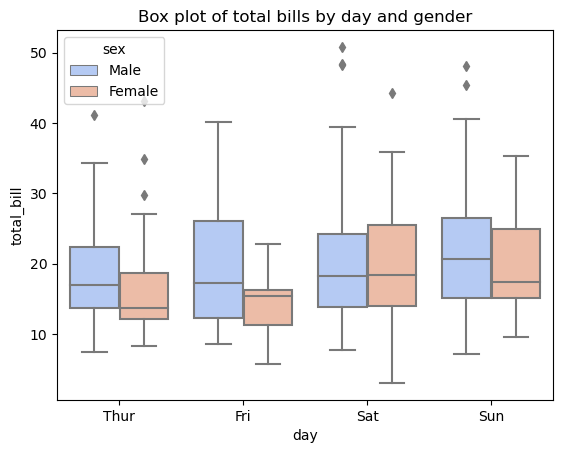

In [42]:
sns.boxplot(data=tips,x="day",y="total_bill",hue="sex",palette="coolwarm")
plt.title("Box plot of total bills by day and gender")
plt.show()

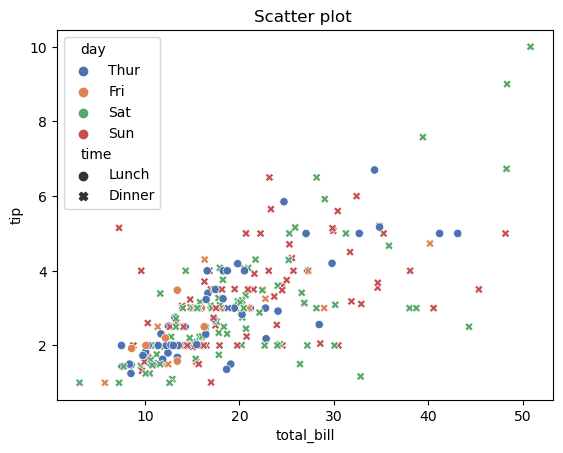

In [43]:
sns.scatterplot(data=tips,x="total_bill",y="tip",hue="day",style="time",palette="deep")
plt.title("Scatter plot ")
plt.show()

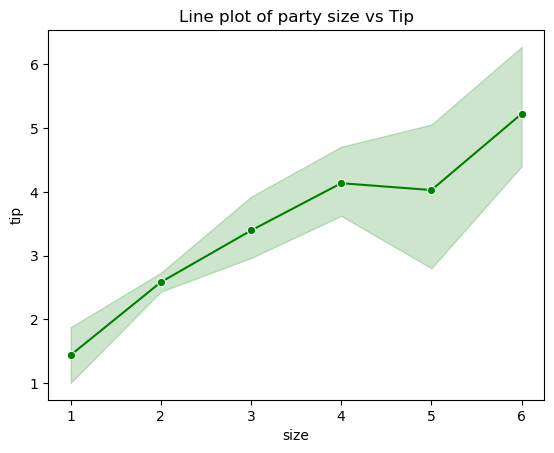

In [44]:
sns.lineplot(data=tips,x="size",y="tip",marker="o",color="green")
plt.title("Line plot of party size vs Tip")
plt.show()

C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


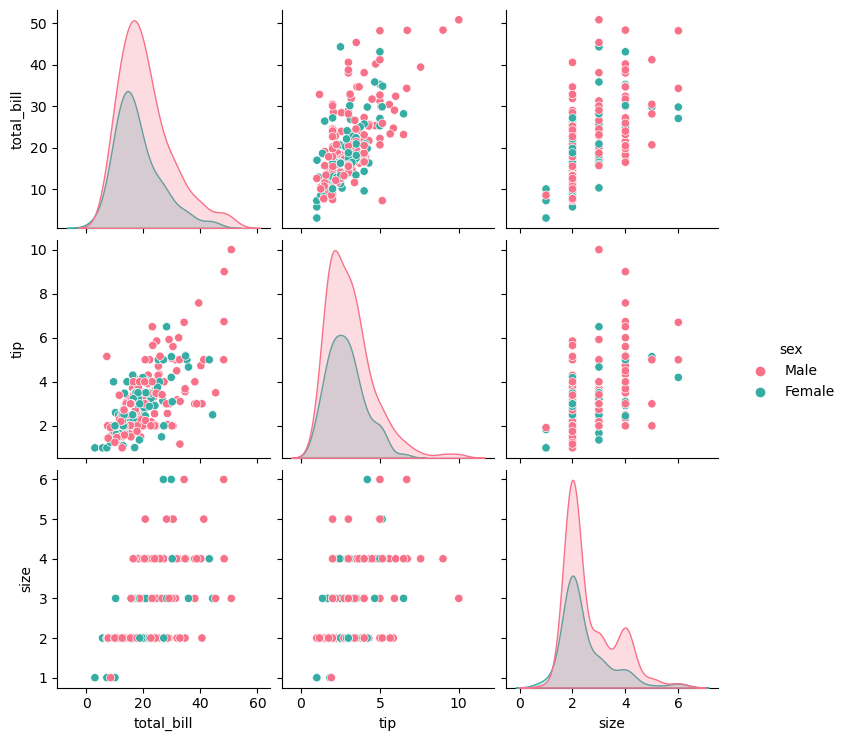

In [45]:
sns.pairplot(data=tips,hue="sex",palette="husl")
plt.show()

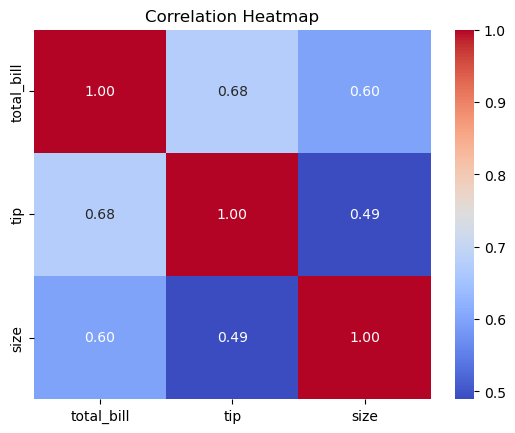

In [48]:
#heatmap displays data as color-coded matrix
numeric_tips = tips.select_dtypes(include='number')
cor_matrix = numeric_tips.corr()
sns.heatmap(cor_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [53]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


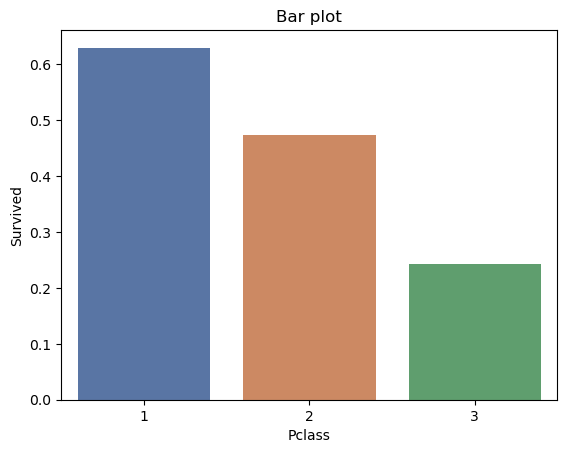

In [61]:
sns.barplot(data=df,x="Pclass",y="Survived",palette="deep",errorbar=None)
plt.title("Bar plot")
plt.xlabel("Pclass")
plt.ylabel("Survived")
plt.show()

<Axes: xlabel='Age', ylabel='Fare'>

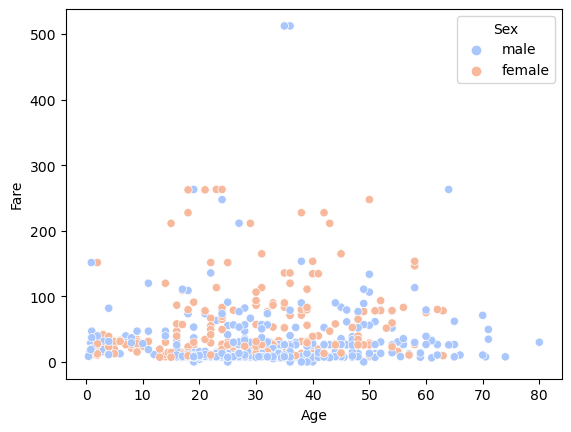

In [70]:
sns.scatterplot(data=df,x="Age",y="Fare",hue="Sex",palette="coolwarm")


C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


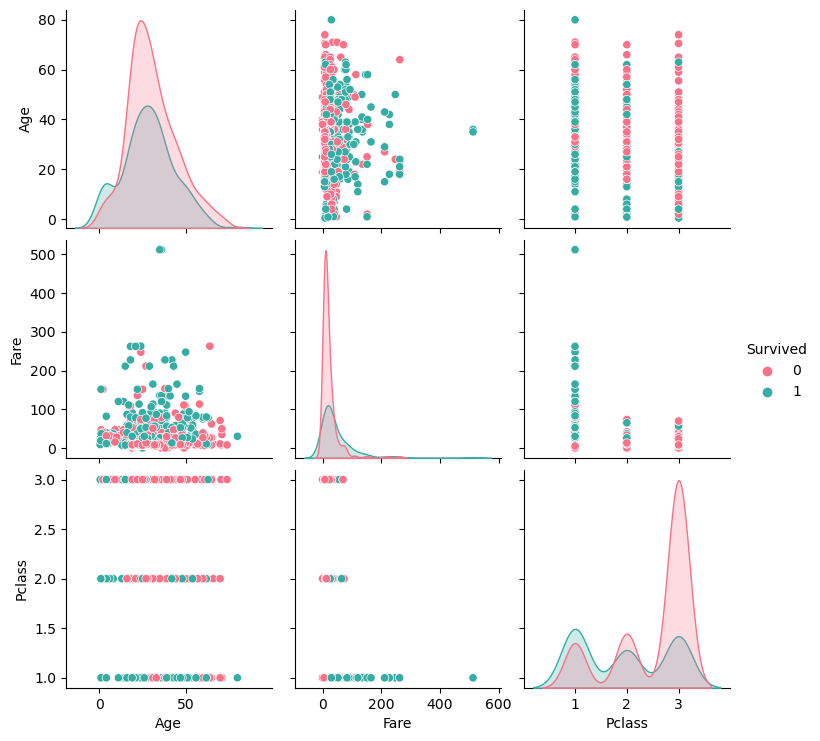

In [79]:
col=['Age','Fare','Pclass','Survived']
sns.pairplot(df[col],hue="Survived",palette="husl")

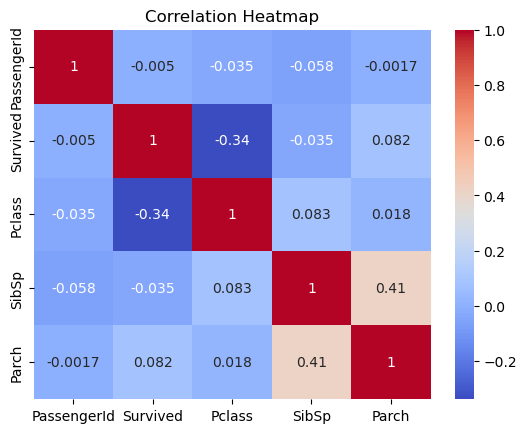

In [86]:
numeric_tips = df.select_dtypes(include='int64')
cor_matrix = numeric_tips.corr()
sns.heatmap(cor_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()